In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
xls = pd.ExcelFile('AnalyticsSkillsTest-FictionalDataSet2.xlsx')
customer_metrics = pd.read_excel(xls, sheet_name=0)
user = pd.read_excel(xls, sheet_name=1)
neighbourhood = pd.read_excel(xls, sheet_name=2)

## Assess the data

In [3]:
customer_metrics.head()

,date,user_id,cookers,canisters,monthly_average_litres_per_user,total_fuel_dispensed_ml,monthly_active
0,2022-10-31,1000006,2,2,10.627901,55093.197034,Active
1,2022-10-31,1000015,1,1,0.000000,22098.394863,Inactive
2,2022-10-31,1000018,1,1,0.000000,19563.876367,Inactive
3,2022-10-31,1000038,1,1,0.000000,15440.789984,Inactive
4,2022-10-31,1000074,1,1,2.201975,24376.765212,Active


In [4]:
user.head()

,user_id,customer_type,fulfilment_date,neighbourhood_id
0,2869,Household,2022-05-19,N10273399
1,6046,Household,2021-03-11,N10272768
2,7937,Household,2021-05-04,N10273020
3,9460,Household,2022-07-07,N10272826
4,9652,Household,2021-01-05,N10272792


In [5]:
neighbourhood.head()

,neighbourhood_id,neighbourhood,network,region,burn_points
0,N10272727,Thika,NAIROBI,capital,94
1,N10272729,Kisauni,MOMBASA,capital,49
2,N10272738,Kayole,NAIROBI,capital,136
3,N10272768,Githurai 45,NAIROBI,capital,69
4,N10272779,Majengo MBA,MOMBASA,capital,27


In [6]:
customer_metrics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171234 entries, 0 to 171233
Data columns (total 7 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   date                             171234 non-null  datetime64[ns]
 1   user_id                          171234 non-null  int64         
 2   cookers                          171234 non-null  int64         
 3   canisters                        171234 non-null  int64         
 4   monthly_average_litres_per_user  171234 non-null  float64       
 5   total_fuel_dispensed_ml          171234 non-null  float64       
 6   monthly_active                   171234 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(1)
memory usage: 9.1+ MB


In [7]:
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39589 entries, 0 to 39588
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   user_id           39589 non-null  int64         
 1   customer_type     39589 non-null  object        
 2   fulfilment_date   39589 non-null  datetime64[ns]
 3   neighbourhood_id  39589 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 1.2+ MB


In [8]:
neighbourhood.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   neighbourhood_id  100 non-null    object
 1   neighbourhood     100 non-null    object
 2   network           100 non-null    object
 3   region            100 non-null    object
 4   burn_points       100 non-null    int64 
dtypes: int64(1), object(4)
memory usage: 4.0+ KB


## Analyze the data

In [9]:
# merge the dataframes
merged_data = pd.merge(customer_metrics, user, on='user_id')
merged_data = pd.merge(merged_data, neighbourhood, on='neighbourhood_id')

In [10]:
merged_data.head()

,date,user_id,cookers,canisters,monthly_average_litres_per_user,total_fuel_dispensed_ml,monthly_active,customer_type,fulfilment_date,neighbourhood_id,neighbourhood,network,region,burn_points
0,2022-10-31,1000006,2,2,10.627901,55093.197034,Active,Household,2021-06-29,N10273049,Pipeline,NAIROBI,capital,48
1,2022-11-30,1000006,2,2,5.336420,60001.579706,Active,Household,2021-06-29,N10273049,Pipeline,NAIROBI,capital,48
2,2022-08-31,1000006,1,1,17.554012,33075.691060,Active,Household,2021-06-29,N10273049,Pipeline,NAIROBI,capital,48
3,2022-09-30,1000006,1,1,11.110988,43299.147758,Active,Household,2021-06-29,N10273049,Pipeline,NAIROBI,capital,48
4,2022-10-31,1000899,1,1,3.134444,53324.876063,Active,Household,2021-06-29,N10273049,Pipeline,NAIROBI,capital,48


### 1. What is the Monthly Active Rate and what can you say about the trend?

In [11]:
# filter the data to include only users who have refilled canisters and 
#have been BURN customers for longer than the measurement period

# filter out "New Users"
latest_date = merged_data["date"].max()
merged_data = merged_data[merged_data["fulfilment_date"] <= latest_date - pd.DateOffset(months=1)]

# calculate the Monthly Active Rate
active_users = merged_data.groupby("date")["canisters"].sum()
total_users = merged_data.groupby("date")["user_id"].nunique()
active_rate = active_users / total_users

# print the Monthly Active Rate
print(active_rate)

date
2022-07-31    1.062577
2022-08-31    1.071007
2022-09-30    1.078586
2022-10-31    1.090711
2022-11-30    1.102351
2022-12-31    1.105015
dtype: float64


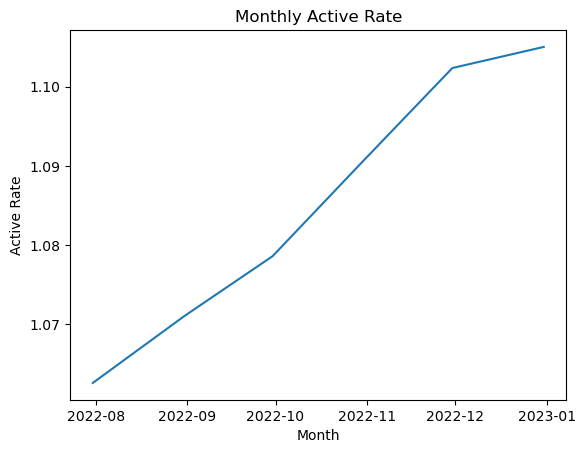

In [14]:
# plot the Monthly Active Rate
plt.plot(active_rate.index, active_rate.values)
plt.title('Monthly Active Rate')
plt.xlabel('Month')
plt.ylabel('Active Rate')
plt.show()

There is a continuous rise in the Monthly Active Rate from August, 2022 to December, 2022. This means that marketing and promotional efforts are being productive and should be continuously optimized for a continuous increase in the retention rate.

### Which neighborhoods / networks have higher retention?

In [15]:

# calculate Monthly Active Rate by neighborhood
active_users = merged_data.groupby("neighbourhood")["canisters"].sum()
total_users = merged_data.groupby("neighbourhood")["user_id"].nunique()
active_rate = active_users / total_users

# sort neighborhoods by Monthly Active Rate
active_rate_sorted = active_rate.sort_values(ascending=False)

# print the neighborhoods with higher retention
print("Neighborhoods with higher retention:")
print(active_rate_sorted.head())

Neighborhoods with higher retention:
neighbourhood
KONYA                 8.750000
KORANDO 'B'           8.000000
KWA SHEE              7.172348
MENENGAI FREE-AREA    7.000000
LANGALANGA NE         6.212121
dtype: float64


### Which neighborhoods have the lowest retention?

In [16]:
# print the neighborhoods with lowest retention
print("Neighborhoods with lowest retention:")
print(active_rate_sorted.tail())

Neighborhoods with lowest retention:
neighbourhood
Korogocho    3.857143
KIRATINA     3.833333
RURII        3.833333
OLIVE INN    3.750000
KOWINO       3.000000
dtype: float64


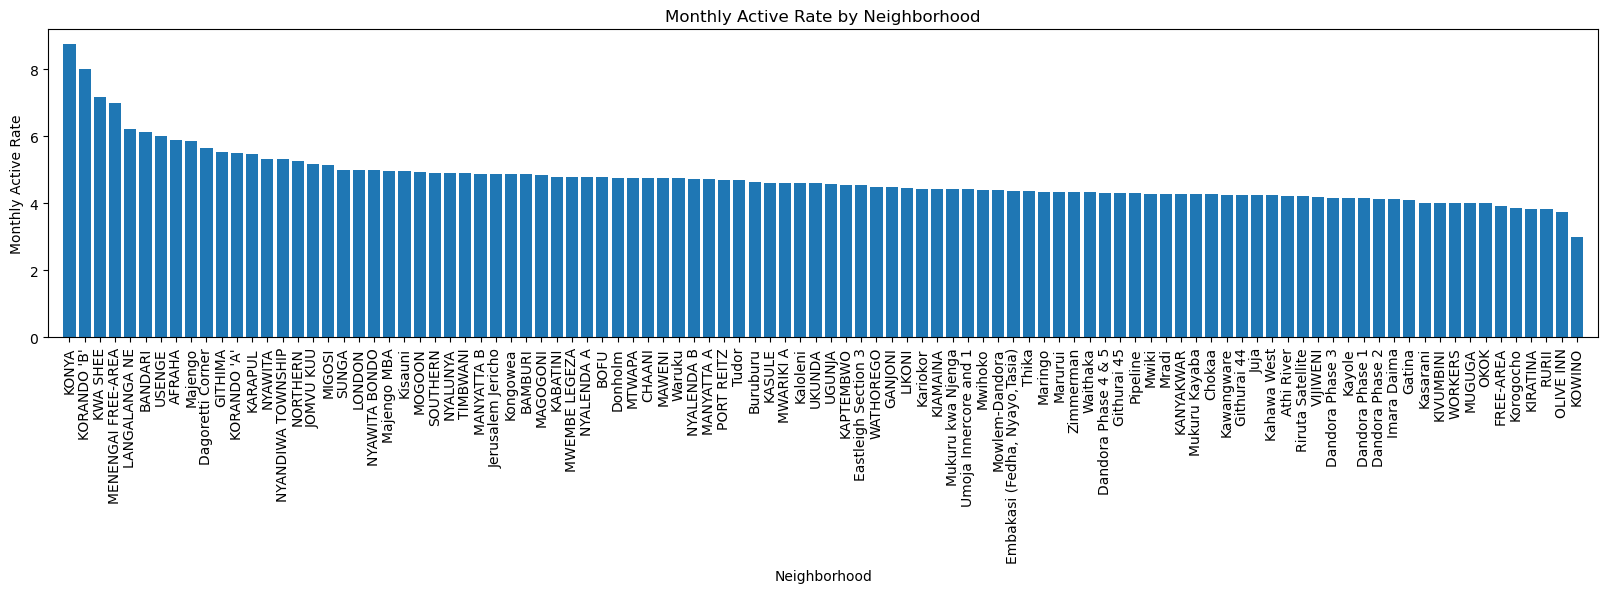

In [17]:
# create bar chart
plt.figure(figsize=[20,4])
plt.bar(active_rate_sorted.index, active_rate_sorted)

plt.title("Monthly Active Rate by Neighborhood")
plt.xlabel("Neighborhood")
plt.ylabel("Monthly Active Rate")
plt.xticks(rotation=90)
plt.margins(x=0.01)
plt.show()

### Is there anything to be said about retention and the number of BURN Points in the various neighborhoods?

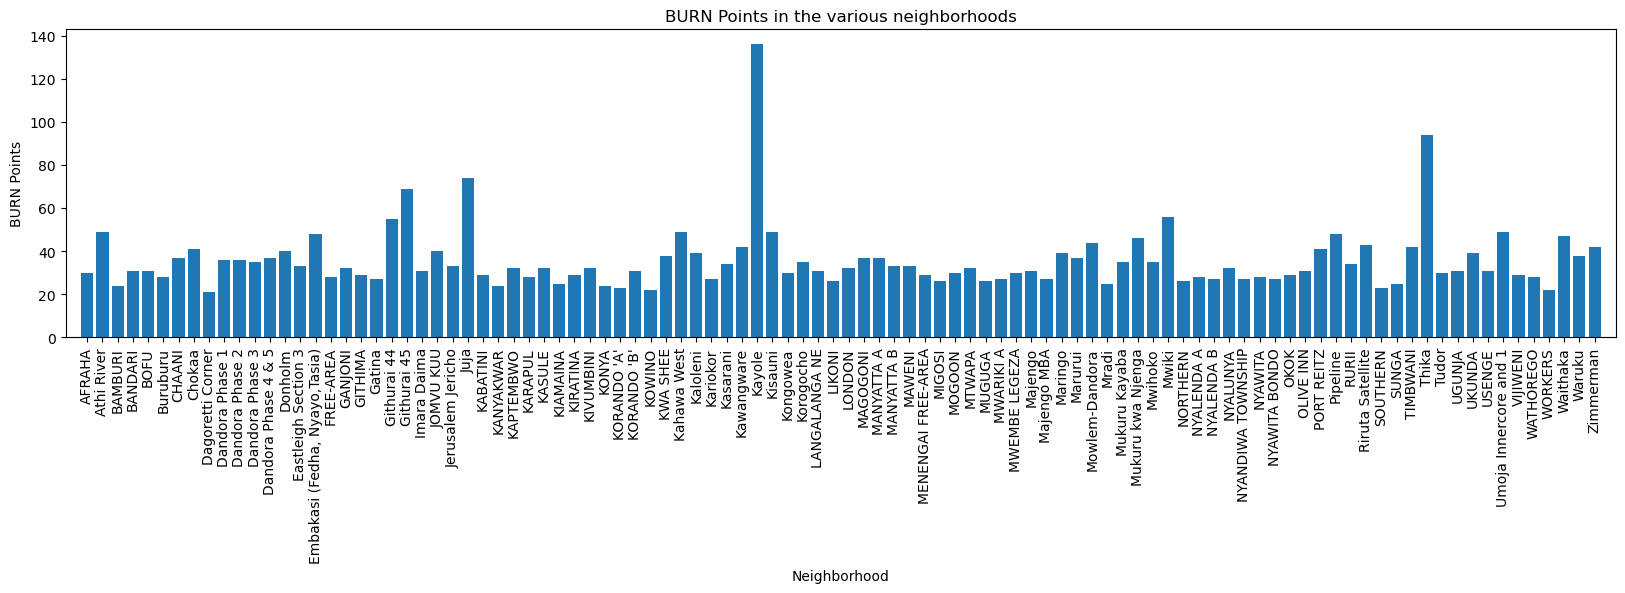

In [18]:
burn_points = merged_data.groupby("neighbourhood")["burn_points"].max()

# create bar chart for BURN points in the various neighborhoods
plt.figure(figsize=[20,4])
plt.bar(burn_points.index, burn_points)

plt.title("BURN Points in the various neighborhoods")
plt.xlabel("Neighborhood")
plt.ylabel("BURN Points")
plt.xticks(rotation=90)
plt.margins(x=0.01)
plt.show()

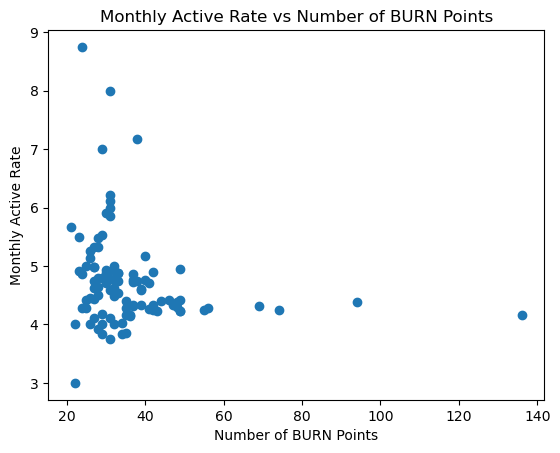

In [19]:
plt.scatter(x=burn_points, y=active_rate)
# add chart labels
plt.title("Monthly Active Rate vs Number of BURN Points")
plt.xlabel("Number of BURN Points")
plt.ylabel("Monthly Active Rate");

There is no direct correlation between burn points and retention rates in the various neighborhoods. Therefore, we can say with confidence that neighborhoods with higher burn points tend to have higher retention rate or are more active that neighborhoods with lower retention rates.

### What other hypothesis do you think could be tested to understand retention?
Some other hypothesis that could be tested to understand retention is analysing retention rate for different customer types. BURN can determine if a certain customer type are more likely to remain active over time and then tailor marketing efforts to attract that segment better.

### What additional data would you want to better answer the above questions?

Additional data containing demographics, customer feedback and surveys and usage patterns will be helpful to identify factors that may affect the retention rate and provide insights on the best ways to optimize user experience to take the retention rate to higher levels for old and new users.

In [21]:
merged_data.to_excel('AnalysticsSkillTest-Answer1.xlsx')